In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os, sys

sys.path.append('/Users/silas/Documents/switchdrive/')
import helper_scripts as hs

import seaborn as sns

import networkx as nx

In [2]:
orf=pd.read_csv("../WD/Genecatalog/clustering/orf2gene.tsv",
                     index_col=0,sep='\t')
orf.head()

orf['Contig']=orf.index.map(lambda s: '_'.join(s.split('_')[:-1]))
orf.head()

,Gene,Contig
ORF,,
shRTF8_0_1,Gene0000001,shRTF8_0
shRTF2_19_1,Gene0000001,shRTF2_19
shHF7_474_36,Gene0000001,shHF7_474
shRTC3_23_171,Gene0000001,shRTC3_23
shHF5_6_1,Gene0000001,shHF5_6


In [3]:
E=pd.read_table('../WD/Genecatalog/annotations/eggNog.tsv.gz',index_col=0)

In [4]:
E.columns

Index(['Target', 'evalue', 'score', 'Taxonomy', 'Protein_name', 'GO_terms',
       'EC', 'KO', 'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction',
       'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'tax_scope',
       'EggNog', 'depricated_bestOG', 'FunctionalCategory', 'Description'],
      dtype='object')

In [5]:
E.tax_scope.unique()

array(['Bacteria', 'Viruses', 'Archaea', 'Mammalia', 'Metazoa',
       'Eukaryota', 'Viridiplantae', 'Opisthokonta', 'Fungi', 'Nematoda',
       'Arthropoda', 'Apicomplexa'], dtype=object)

In [6]:
orf=orf.join(E[['tax_scope','Taxonomy']],on='Gene')
orf=orf.fillna('Unknown')

In [8]:
nt=orf.groupby(['Contig','tax_scope']).size().unstack(fill_value=0)

In [45]:
Domain_of_interest='Viruses'

In [46]:
contigs_with_viruses =nt[Domain_of_interest]>0
nv= nt.loc[contigs_with_viruses].sort_values(Domain_of_interest)
#nv= nv.loc[(nv.sum(1)-nv.Viruses) <=nv.Viruses*1.5]
nv=nv.loc[:,~(nv==0).all()]

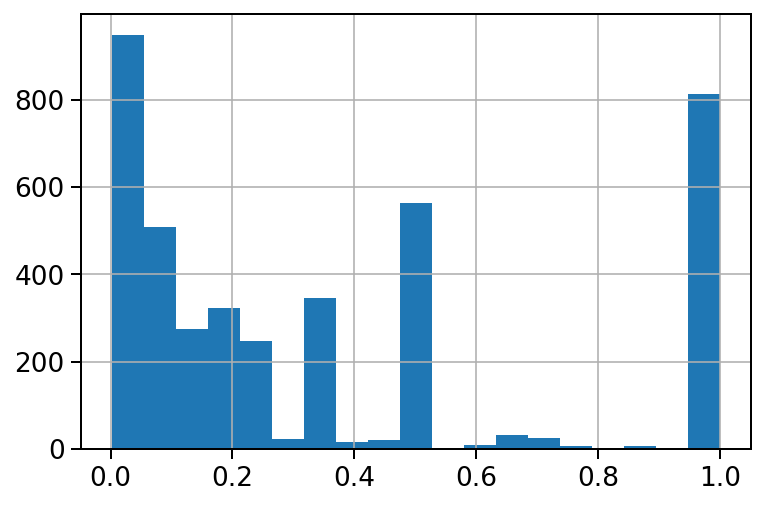

In [68]:
ratio= nv[Domain_of_interest] / nv.drop('Unknown',axis=1).sum(1)
ratio.hist(bins='auto')

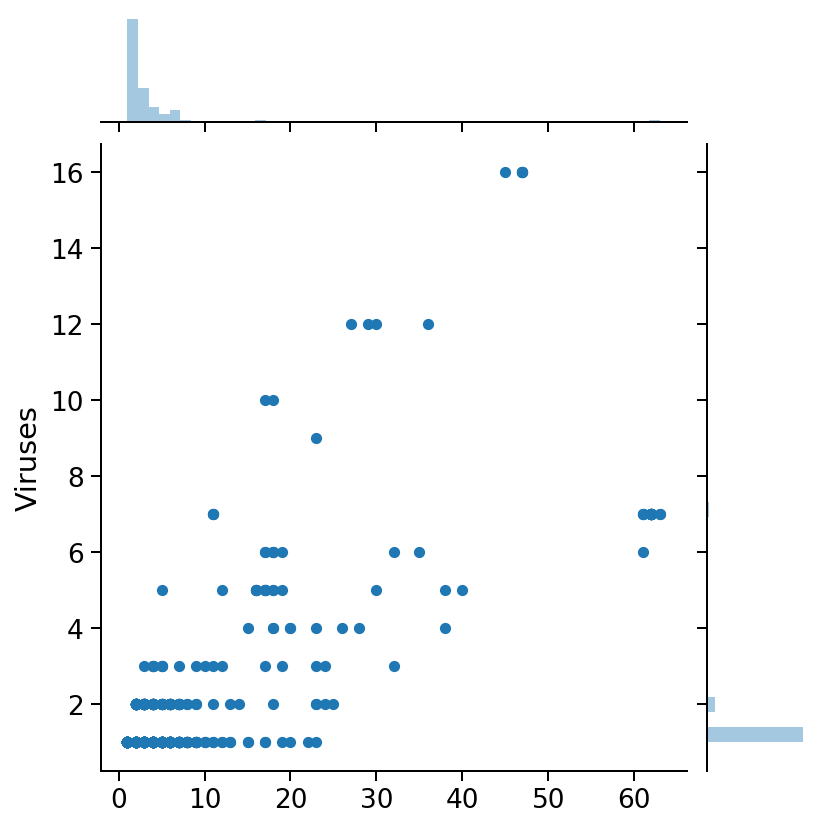

In [90]:
sns.jointplot(y=nv[Domain_of_interest].loc[ratio>=0.5], x=nv.sum(1).loc[ratio>=0.5])

In [76]:
nv.loc[(ratio==0.5)]

tax_scope,Archaea,Arthropoda,Bacteria,Eukaryota,Fungi,Mammalia,Metazoa,Nematoda,Unknown,Viridiplantae,Viruses
Contig,,,,,,,,,,,
shRTC5_28155,0,0,1,0,0,0,0,0,1,0,1
shRTC5_28654,0,0,1,0,0,0,0,0,0,0,1
shRTC5_30650,0,0,1,0,0,0,0,0,1,0,1
shRTC5_31656,0,0,1,0,0,0,0,0,0,0,1
shRTC5_35021,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
shRTC7_682,0,0,12,0,0,0,0,0,12,0,12
shHC7_451,0,0,16,0,0,0,0,0,15,0,16
shHF6_1165,0,0,16,0,0,0,0,0,15,0,16


In [70]:
high_prob= ((ratio>0.5) )
high_prob.sum()

#nv.loc[(ratio>=0.8)&(nv.Viruses==1)].sum(1)


897

In [33]:
nv.loc[vir_ratio>0.5].shape

(897, 11)

In [80]:
contig= orf.query('Contig=="shHC6_564"').copy()
contig['GeneNr']=contig.index.map(lambda s: int(s.split('_')[-1]))
contig=contig.sort_values('GeneNr')

/Users/silas/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


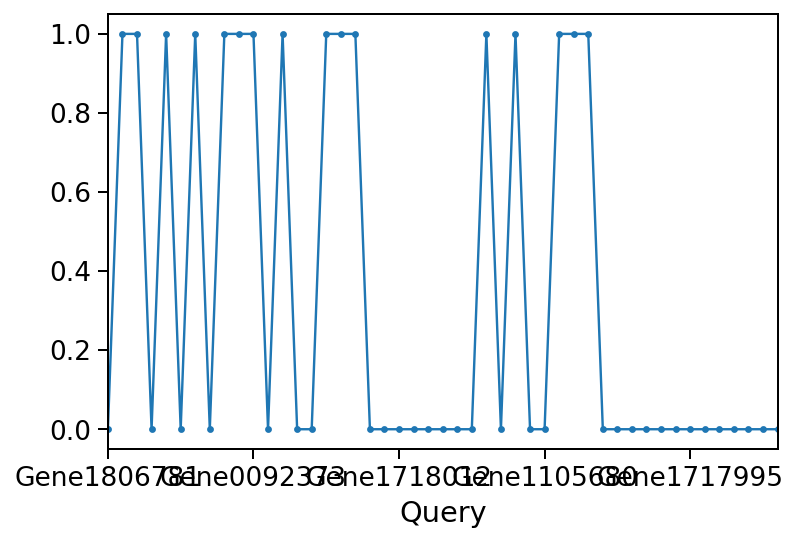

In [81]:
((E.loc[contig.Gene].tax_scope==Domain_of_interest)*1).plot(marker='.')#.dropna(how='all')

In [23]:
ntr= (nt.T/nt.sum(1)).T

KeyboardInterrupt: 

In [ ]:
ntr['Viruses']

= nt.swaplevel().loc['Viruses'].index

nt.loc[contigs_with_viruses]